# Interpretable Machine Learning

### Dataset - Telecom Customer Churn

### Python Libraries -- XGBOOST,  ELI5

In [52]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [53]:
import eli5
from eli5 import show_prediction

### 1. Dataset Reading and Data Pre-processing 

In [54]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

## 2. Plotting Feature Imporatance using xgboost 

### 2.1 Conversion of Categorical Features into Numerical Features 

Conversion of Categorical Features into Numerical Features is required since most of ML and DL Algos are not working properly at categorical data 

In [55]:
df = df.apply(LabelEncoder().fit_transform)

In [56]:
########   Conversion into X and y ##################
X = df.iloc[:, :20]
y = df.iloc[:, 20:]

In [57]:
### Dimensions of Matrix X and Vector Y
print(X.shape)
print(y.shape)

(7043, 20)
(7043, 1)


### 2.2 xgboost Model Fit

In [58]:
# fit model training data
model = XGBClassifier()
model.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

### 2.3 Feature Importance with Importance Type = 'Wieght' 

Importance Type = 'Wieght' is based on the number of times a feature appears in a tree

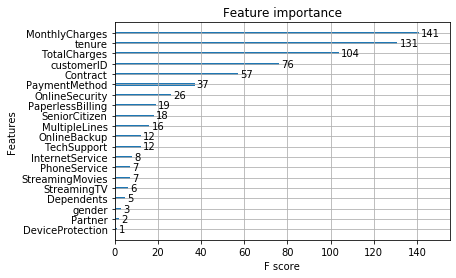

In [59]:
plot_importance(model,importance_type='weight')

::: Monthly Charges, Tenure and Total Charges are top three features obtained from when Importance Type = 'Wieght'  

### 2.4 Feature Importance with Importance Type = 'Gain' 

Importance Type = 'Gain' is based on the average gain of splits which use the feature

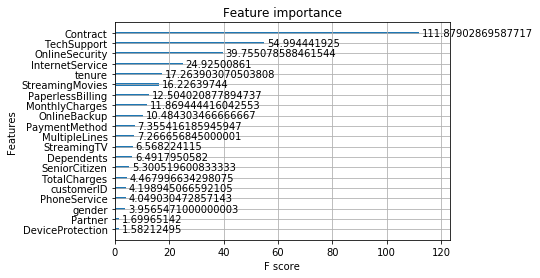

In [60]:
plot_importance(model,importance_type='gain')

 ::: Contract, Tech Support and Online Security are top three features obtained from when Importance Type = 'Gain'

### 2.5 Feature Importance with Importance Type = 'Cover' 

Importance Type = 'Cover' is based on the average coverage -- number of samples affected of splits which use the feature

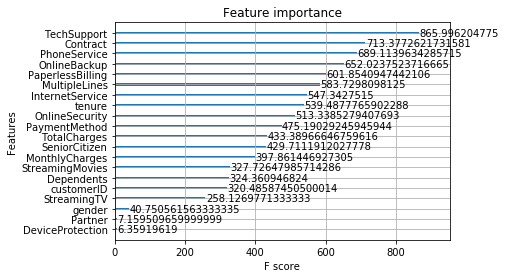

In [61]:
plot_importance(model,importance_type='cover')

::: Tech Support, Contract, and Phone Services are top three features obtained from when Importance Type = 'Cover'

::: Contract, Tech Support and Online Security are top three features repectively using ELI5 tool

# 3. XGBoost Model 

### 3.1 Train and Test Sets (70% and 30%) 

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

### 3.2 Implementation  of XGBOOST Model 

In [63]:
# fit model on all training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [64]:
# make predictions for test data and evaluate
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)

In [65]:
print("Accuracy of xgboost: %.2f%%" % (accuracy * 100.0))

Accuracy of xgboost: 80.69%


# 4. Plotting Feature Importance using ELI5

ELI5 is a Python package which helps to debug machine learning classifiers and explain their predictions.

https://github.com/TeamHG-Memex/eli5

### 4.1 Feature Importance through ELI5 

In [66]:
eli5.show_weights(model.get_booster())

Weight,Feature
0.3316,Contract
0.1335,OnlineSecurity
0.1051,TechSupport
0.0688,InternetService
0.0524,StreamingMovies
0.0460,tenure
0.0366,PaperlessBilling
0.0284,MonthlyCharges
0.0266,OnlineBackup
0.0251,SeniorCitizen


### 4.2 Reasons for Individual Predictions

In [78]:
print(y_train.iloc[1])
show_prediction(model, X_test.iloc[1], feature_names = X.columns.tolist(), 
                show_feature_values=True)

Churn    1
Name: 1944, dtype: int32


::: Above table explains the features behind individual predictions. For a Churned customer -- main features are Contract, Tenure and Online Security  